https://www.alpha-i.co/blog/MNIST-for-ML-beginners-The-Bayesian-Way.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
#from edward.models import Categorical, Normal
#import edward as ed
import pandas as pd
import pickle
import seaborn as sns
#ed.set_seed(314159)

/Users/karimimohammedbelhal/Desktop/ongoing/hostnfly/deeptech/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [19]:
error = pd.read_csv('precisionsim2.csv')

In [24]:
test = error[error.algo.isin(["SAGA","OEMVR"])]

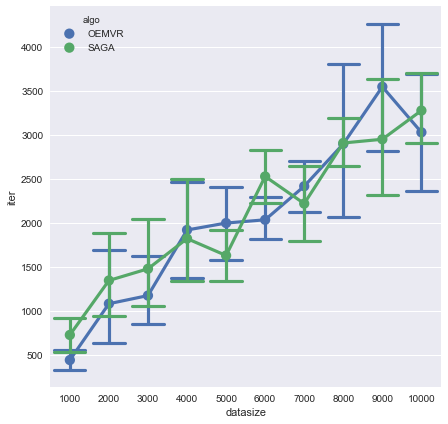

In [28]:
f, ax = plt.subplots(figsize=(7, 7))
#ax.set(xscale="log", yscale="log")
sns.pointplot(x="datasize", y="iter", ax=ax,data=test,hue='algo', capsize=.8)
#ax.set_yscale('log')
#ax.set_xscale('log')

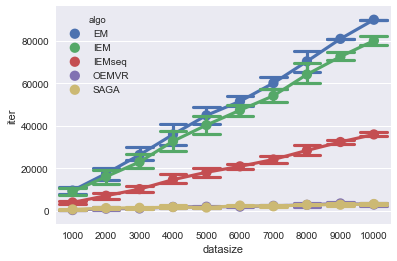

In [26]:
sns.set(style="darkgrid")
ax = sns.pointplot(x="datasize", y="iter", data=error,hue='algo', capsize=.8)

In [100]:
error[error.algo=='EM']

,Unnamed: 0,datasize,algo,variable,iter
0,1,1000,EM,X1,7000
1,2,2000,EM,X1,20000
2,3,3000,EM,X1,27000
3,4,4000,EM,X1,44000
4,5,5000,EM,X1,50000
5,6,6000,EM,X1,54000
6,7,7000,EM,X1,63000
7,8,8000,EM,X1,80000
8,9,9000,EM,X1,81000
9,10,10000,EM,X1,90000


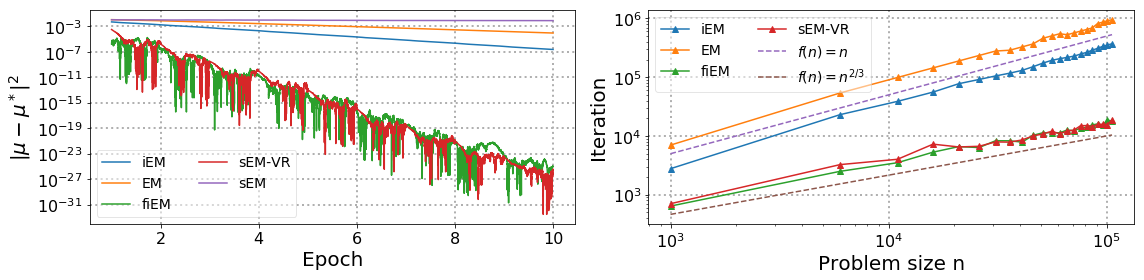

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 4))
ax = plt.subplot(1, 2, 1)

ax.set_yscale('log')
plt.plot(xaxisrun, iemrun, label='iEM', marker='')
plt.plot(xaxisrunem, emrun, label='EM', marker='')
plt.plot(xaxisrun, fiemrun, label='fiEM', marker='')
plt.plot(xaxisrun, svremrun, label='sEM-VR', marker='')
plt.plot(xaxisrun, oemrun, label='sEM', marker='')
leg = plt.legend(fontsize=14,fancybox=True, loc=3,ncol=2)
leg.get_frame().set_alpha(0.5)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(r'$|\mu-\mu^*|^2$', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(linestyle='dotted',linewidth=2)

ax = plt.subplot(1, 2, 2)
ax.set_yscale('log')
ax.set_xscale('log')
plt.plot(xaxis, iem, label='iEM', marker='^')
plt.plot(xaxis, em, label='EM', marker='^')
plt.plot(xaxis, fiem, label='fiEM', marker='^')
plt.plot(xaxis, svrem, label='sEM-VR', marker='^')
plt.plot(xaxis, lin, label=r'$f(n)=n$', marker='',linestyle='dashed')
plt.plot(xaxis, sublin, label=r'$f(n)=n^{2/3}$', marker='',linestyle='dashed')
leg = plt.legend(fontsize=14,fancybox=True, loc=0,ncol=2)
leg.get_frame().set_alpha(0.5)
plt.xlabel('Problem size n', fontsize=20)
plt.ylabel('Iteration', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(linestyle='dotted',linewidth=2)
fig.tight_layout()
plt.show()

In [17]:
fig.savefig("gmm2.png",bbox_inches = 'tight')